# NLP - Sentiment Analysis Hotel based on Review with Comparing Naive Bayes and SVM

In [40]:
#import library

import numpy as np
#import pandas
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import classification_report, confusion_matrix
#import Natural Language Toolkit
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

Data Facts and Import

In [41]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [42]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [43]:
rcParams['figure.figsize'] = 10, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [44]:
#import data
corpus = pd.read_csv("./Review's Hotel.csv")

In [45]:
#Check the shape (number of columns and rows) in the dataset
corpus.shape

(35912, 19)

In [46]:
print('Panjang Corpus : ',len(corpus))

Panjang Corpus :  35912


In [47]:
#Show data
corpus.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [48]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews_date          35653 non-null  object 
 10  reviews_dateAdded     35912 non-null  object 
 11  reviews_doRecommend   0 non-null      float64
 12  reviews_id            0 non-null      float64
 13  reviews_rating        35050 non-null  float64
 14  reviews_text          35890 non-null  object 
 15  reviews_title      

In [49]:
#display descriptive statistics
corpus.describe()

,latitude,longitude,reviews_doRecommend,reviews_id,reviews_rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [50]:
print('Mean of hotel reviews: ', round(corpus['reviews_rating'].mean()))

Mean of hotel reviews:  4


In [51]:
review=pd.DataFrame(corpus.groupby('reviews_rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews_rating,No of Users
0,5.0,12671
1,4.0,9755
2,3.0,5708
3,1.0,3068
4,2.0,2979


# Exploratory Data Analysis

In [52]:
#Check for missing values in the dataset
corpus.isnull().sum(axis=0)

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews_date              259
reviews_dateAdded           0
reviews_doRecommend     35912
reviews_id              35912
reviews_rating            862
reviews_text               22
reviews_title            1622
reviews_userCity        19649
reviews_username           43
reviews_userProvince    18394
dtype: int64

In [53]:
#Checking Missing value in the dataset and printing the percentage for missing value for each column
count = corpus.isnull().sum().sort_values(ascending=False)
percentage = (corpus.isnull().sum()/corpus.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count', 'Percentage'])

print('Count and percentage of missing value for the columns:')
missing_data['Percentage']=missing_data['Percentage'].apply(lambda x: x*100)
missing_data.loc[missing_data['Percentage'] > 10][:10]


Count and percentage of missing value for the columns:


,Count,Percentage
reviews_id,35912,100.000000
reviews_doRecommend,35912,100.000000
reviews_userCity,19649,54.714302
reviews_userProvince,18394,51.219648


In [54]:
for i in range(0,len(corpus)-1):
    if type(corpus.iloc[i]['reviews_text']) != str:
        corpus.iloc[i]['reviews_text'] = str(corpus.iloc[i]['reviews_text'])

C:\Users\Lenovo\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
corpus = corpus[corpus['reviews_rating'] != 3]
corpus.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [56]:
#labeling data
def sentiment(n):
    return 'positive' if n > 4.0 else 'negative'
corpus['response'] = corpus['reviews_rating'].apply(sentiment)
corpus.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince,response
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,negative
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,positive
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,positive
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,positive
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,positive


In [57]:
corpus.sample(10)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince,response
3619,33 Deadwood St,"Casinos,Hotels,American Restaurants,Wedding Re...",Deadwood,US,44.376034,-103.729900,Martin Mason Hotel,57732,Roubaix,2015-07-24T00:00:00Z,2016-06-14T02:24:58Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,Very cool hotel in South Dakota,Grand Rapids,write a review,MI,negative
30340,446 Southbridge St,Hotels,Auburn,US,42.199763,-71.840633,La Quinta Inn Auburn Worcester,1501,MA,2016-07-19T00:00:00Z,2016-11-16T07:32:02Z,NaN,NaN,4.0,Good easy stay,Exactly what you expect,New York City,A Traveler,NY,negative
11051,1700 Eighth St N W,"Hotel,Hotels",Austin,US,43.681877,-92.983950,Americinn Lodge Suites Austin,55912,Andyville,2015-12-31T00:00:00Z,2016-03-29T06:21:40Z,NaN,NaN,5.0,Pat was excellent at the front desk and went a...,Great customer service,Btown,lcacka,NaN,positive
34266,14355 S Highway 31 Exit 432,"Hotel,Hotels",Gretna,US,41.097218,-96.253174,Super 8 Gretna,68028,NE,2015-10-06T00:00:00Z,2016-03-23T04:28:26Z,NaN,NaN,2.0,Room was okay - bed was comfortable. Found hal...,Meh,Saint Paul,496scottp,MN,negative
33282,1400 Roebuck Dr,Hotels,Meridian,US,32.350392,-88.691659,La Quinta Inn and Suites Meridian,39301,Meeham,2016-01-14T00:00:00Z,2016-11-16T03:54:39Z,NaN,NaN,5.0,"easy to get to from I-20, clean and comfortable",liked it!,Murfreesboro,Linda,NaN,positive
17824,1701 Us Highway 93 S,Hotels,Kalispell,US,48.182450,-114.305260,Fairbridge Inn,59901,MT,2015-07-07T00:00:00Z,2016-11-09T19:09:28Z,NaN,NaN,2.0,The hotel was a far cry from the advertising o...,Avoid if possible,NaN,Mark,NaN,negative
13736,4424 Cleburne Blvd,"Hotels,Hotels & Motels",Dublin,US,37.072620,-80.696790,Quality Inn,24084,VA,2016-07-28T00:00:00Z,2016-11-05T00:16:37Z,NaN,NaN,2.0,Rooms need updating,"Adequate, but no more than that.",NaN,cathy L,NaN,negative
11722,135 Route 28,Hotels,West Yarmouth,US,41.657447,-70.261804,Tidewater Inn,2673,Yarmouth,2015-08-24T00:00:00Z,2016-10-27T18:54:12Z,NaN,NaN,4.0,Spent 2 nights in very hot summer. AC worked g...,Very good location.,Chatham,A Traveler,NaN,negative
12626,653 Clark Rd,Hotels,Rockford,US,42.273880,-88.967200,Extended Stay America - Rockford - I-90,61107,IL,2014-12-15T00:00:00Z,2016-11-06T19:02:52Z,NaN,NaN,5.0,This is the hotel I always choose when I stay ...,Can't Go Wrong Here,NaN,lauren,NaN,positive
28275,101 Chelsea Rd,"Hotels,Bed & Breakfasts",Bella Vista,US,36.464432,-94.251779,The Inn At Bella Vista,72714,AR,2016-09-26T00:00:00Z,2016-11-01T00:00:38Z,NaN,NaN,5.0,"The owners, Bill and Beverly make you feel rig...",A quiet spot in the forest.,Austin,A Traveler,TX,positive


In [58]:
corpus[['reviews_text','response']]

,reviews_text,response
0,Pleasant 10 min walk along the sea front to th...,negative
1,Really lovely hotel. Stayed on the very top fl...,positive
2,Ett mycket bra hotell. Det som drog ner betyge...,positive
3,We stayed here for four nights in October. The...,positive
4,We stayed here for four nights in October. The...,positive
...,...,...
35907,Best of the Best!!!! My family and I stayed in...,positive
35908,Amazing Vacation in Beautiful Cabin We stayed ...,positive
35909,My husband and I stayed at Tree Tops which is ...,positive
35910,to share your opinion of this businesswith YP ...,negative


In [59]:
review_positif = len([x for x in corpus['response'] if x == 'positive'])
review_negatif = len([x for x in corpus['response'] if x == 'negative'])
print('Positive Reviews : ',review_positif)
print('Negative Reviews : ',review_negatif)

Positive Reviews :  13153
Negative Reviews :  17051


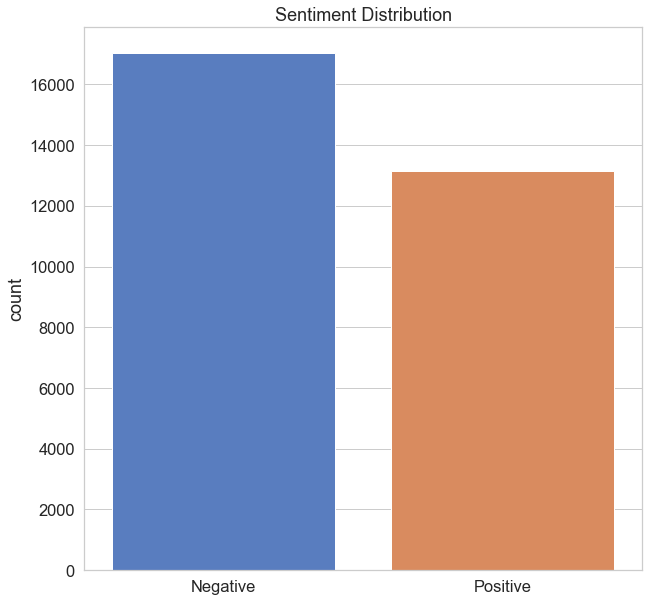

In [60]:
#show the sentiment distribution
f = sns.countplot(x='response', data=corpus)
f.set_title("Sentiment Distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

# Text Cleaning

In [61]:
#Regular Expression method to search for matching texts
tokenizer = WordPunctTokenizer()
review_handle = r'@[A-Za-z0-9_]+'                         # remove review handle (@username)
url_handle = r'http[^ ]+'                                  # remove website URLs that start with 'https?://'
combined_handle = r'|'.join((review_handle, url_handle))  # join
www_handle = r'www.[^ ]+'                                  # remove website URLs that start with 'www.'
punctuation_handle = r'\W+'

In [62]:
#import text file of stop words, stop words are the most common words in a language that adds no semantics meaning to a sentence
stopwords = set(pd.read_csv('./stop-word-list.txt', sep='\n', header=0).stopword)

In [63]:
#define a function called process_text to process the text using the methods listed
# case folding
# remove punctuation
# stopword removal
# remove review handle (@username)
# remove website URLs that start with 'https?://'
# remove website URLs that start with 'www.'
# tokenization

def process_text(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()

    try:
        text = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        text = souped

    cleaned_text = re.sub(punctuation_handle, " ",(re.sub(www_handle, '', re.sub(combined_handle, '', text)).lower()))
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stopwords])

    return (" ".join([word for word in tokenizer.tokenize(cleaned_text) if len(word) > 1])).strip()

In [64]:
#test the above text cleaning method
example_text = "Stayed with parents, wife twin toddlers in two triple rooms. The hotel is easy to reach and the rooms were well placed well furnished. The best feature was extremely friendly helpful staff, particularly Ms. Annalucia Ms. Anna who were always ready to listen help out with big smiles. The breakfasts were very good, with good spread and the guests were made welcome to sit and eat at leisure (more important when you are with toddlers!) Would surely go back to Venice would happily stay again at Russo Palace."

process_text(example_text)

'stayed parents wife twin toddlers triple rooms hotel easy reach rooms placed furnished best feature extremely friendly helpful staff particularly ms annalucia ms anna ready listen help big smiles breakfasts good good spread guests welcome sit eat leisure important toddlers surely venice happily stay russo palace'

In [65]:
word = "cause youre strong, you are wise"

In [37]:
#remove punctuation
no_punctuations=[]
i=0
for texts in corpus['reviews_text']:
    for punctuation in string.punctuation:
        texts = word.replace(punctuation,"")
    for number in '1234567890':
        texts = word.replace(number,"")
    corpus['reviews_text'][i] = texts
    i = i+1
    
corpus['reviews_text'].head()

C:\Users\Lenovo\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Lenovo\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Lenovo\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

0    cause youre strong, you are wise
1    cause youre strong, you are wise
2    cause youre strong, you are wise
3    cause youre strong, you are wise
4    cause youre strong, you are wise
Name: reviews_text, dtype: object

In [38]:
#Membuat kelas tokenisasi
class Tokenizer:
    
    #clean html tag in review
    def clean(self, text):
        no_html = BeautifulSoup(text).get_text()
        clean = re.sub("[^a-z\s]+", " ", no_html, flags=re.IGNORECASE)
        return re.sub("(\s+)", " ", clean)
    
    #tokenizing corpus
    def tokenize(self, text):
        clean = self.clean(text).lower()
        stopwords_en = stopwords.words("english")
        return [w for w in re.split("\W+", clean) if not w in stopwords_en]
        #stem tokenized word
        porter.stem(w)

In [39]:
#Multinomial NB kelas yang digunakan untuk menganalisis data
class MultinomialNaiveBayes:
    def __init__(self, classes, tokenizer):
        self.tokenizer = tokenizer
        self.classes = classes
      
    def group_by_class(self, X, y):
        data = dict()
        for c in self.classes:
            data[c] = X[np.where(y == c)]
        return data
           
    def fit(self, X, y):
        self.n_class_items = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        
        grouped_data = self.group_by_class(X, y)
        
        for c, data in grouped_data.items():
          self.n_class_items[c] = len(data)
          self.log_class_priors[c] = math.log(self.n_class_items[c] / n)
          self.word_counts[c] = defaultdict(lambda: 0)
          
          for text in data:
            counts = Counter(self.tokenizer.tokenize(text))
            for word, count in counts.items():
                if word not in self.vocab:
                    self.vocab.add(word)

                self.word_counts[c][word] += count
                
        return self
#fungsi laplace smoothing untuk menghilangkan kemungkinan nilai 0 pada data      
    def laplace_smoothing(self, word, text_class):
        num = self.word_counts[text_class][word] + 1
        denom = self.n_class_items[text_class] + len(self.vocab)
        return math.log(num / denom)
#fungsi prediksi terhadap kata yang ditokenisasi terhadap sentiment berdasarkan review      
    def predict(self, X):
        result = []
        for text in X:
          
          class_scores = {c: self.log_class_priors[c] for c in self.classes}

          words = set(self.tokenizer.tokenize(text))
          for word in words:
              if word not in self.vocab: continue

              for c in self.classes:
                
                log_w_given_c = self.laplace_smoothing(word, c)
                class_scores[c] += log_w_given_c
                
          result.append(max(class_scores, key=class_scores.get))

        return result